## Notebook for prepping training data from IBIS cubes!

In [15]:
import numpy as np
import sparsetools as sp
import imtools as im #in the STiC example folder
import matplotlib.pyplot as plt 

In [4]:
imodel1 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_122_c2.nc")

model::read: atmos type -> depth-stratified
model::read: nx=170, ny=350, ndep=65, nt=1
model::setSize: nx = 170, ny = 350, ndep = 65, nt = 1


In [5]:
# Nodes positions: 

# nodes_temp = -4.0, -3.5, -3.0, -2.5, -1.8, -1.0, 0.0, 0.8
# nodes_vlos = -4.0, -3.0, -2.0, -1.0, 0
# nodes_vturb = -4.0, -3.0, -2.0, -1.0, 0

In [12]:
temperature = imodel1.temp[0,]
vlos = imodel1.vlos[0,]
vturb = imodel1.vturb[0,]
cmass = imodel1.cmass[0,0,0,:] # the cmass array is the same for every pixel

In [19]:
print(cmass)

[-5.58038139 -5.48038149 -5.38038158 -5.2803812  -5.1803813  -5.08038139
 -4.98038149 -4.88038158 -4.7803812  -4.6803813  -4.58038139 -4.48038149
 -4.38038158 -4.2803812  -4.1803813  -4.08038139 -3.98038149 -3.88038135
 -3.78038144 -3.68038154 -3.58038139 -3.48038149 -3.38038135 -3.28038144
 -3.18038154 -3.08038139 -2.98038149 -2.88038135 -2.78038144 -2.68038154
 -2.58038139 -2.48038149 -2.38038135 -2.28038144 -2.18038154 -2.08038139
 -1.98038137 -1.88038146 -1.78038144 -1.68038142 -1.58038139 -1.48038137
 -1.38038146 -1.28038144 -1.18038142 -1.08038139 -0.98038143 -0.88038141
 -0.78038144 -0.68038142 -0.58038145 -0.48038143 -0.38038144 -0.28038144
 -0.18038143 -0.08038143  0.01961857  0.11961857  0.21961857  0.31961858
  0.41961858  0.51961857  0.61961859  0.71961856  0.81961858]


In [24]:
inodes_temp = np.array([16,21,26,31,38,46,56,64])
inodes_vlos = np.array([16,26,36,46,56])
inodes_vturb = np.array([16,26,36,46,56])

print (cmass[inodes_temp])

[-3.98038149 -3.48038149 -2.98038149 -2.48038149 -1.78038144 -0.98038143
  0.01961857  0.81961858]


In [25]:
tempnodes = temperature[:,:,inodes_temp]
vlosnodes = vlos[:,:,inodes_vlos]
vturbnodes = vturb[:,:,inodes_vturb]

In [ ]:
imodel1 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_122_c2.nc")
imodel1 = sp.model("c:/Data/QS_inversions/atmosout_IBIS_data_inversion_patch_122_c2.nc")

In [27]:
from astropy.io import fits

In [31]:
temphdu = fits.PrimaryHDU(tempnodes)
vloshdu = fits.ImageHDU(vlosnodes)
vturbhdu = fits.ImageHDU(vturbnodes)
mylist = fits.HDUList([temphdu, vloshdu, vturbhdu])
mylist.writeto("test_nodes_122_c2.fits", overwrite=True)


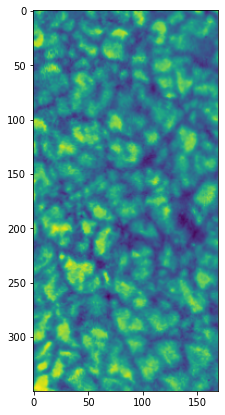

In [18]:
plt.figure(figsize=[12,7])
plt.imshow(temperature[:,:,-1])